In [49]:
import matplotlib
#matplotlib.use('nbagg')
print("mpl: ", matplotlib.__version__)

import numpy as np
print("np: ", np.__version__)
import scipy.stats as sst
import scipy as sp
print("sp: ", sp.__version__)
import matplotlib.pylab as plt

mpl:  2.0.0
np:  1.11.3
sp:  0.18.1


# Homework 02 - Statistics

## 1. load bivariate data

a. select one of the data-set available at
  
  `.../_geostats17_repo/data/homework_01`
  
08_Pace of life.csv

Each data-set contains at least 2 variables. If it contains more, at least pick two interesting ones, or repeat the analysis for multiple pairs

b. plot the data-set in a meaningful way

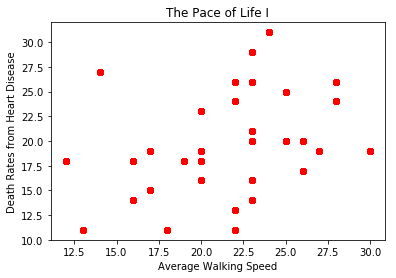

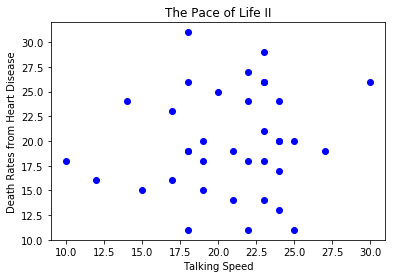

In [50]:
# Load columns "walk, "talk" and "heart"
data = np.loadtxt('C:/Users/Heiko/Studium/Geostatistics/geostats_17/data/homework_01/08_Pace of life.csv', delimiter=',', skiprows=(1),usecols=(1,3,4))
w,t,h=data.T # w is "walk",t is "talk", h is "heart"

# Plot "walk" and "heart"
plt.plot(w,h,"ro")
plt.xlabel ('Average Walking Speed')
plt.ylabel ('Death Rates from Heart Disease')
plt.title ('The Pace of Life I')
plt.show ()

# Plot "talk" and "heart"
plt.plot(t,h,"bo")
plt.xlabel ('Talking Speed')
plt.ylabel ('Death Rates from Heart Disease')
plt.title ('The Pace of Life II')
plt.show ()


## 2. empirical statistics

- calculate the first 4 central statistical moments for the chosen pair of variables
- for the pair: calculate bivariate statistics
    - covariance
    - correlation
    - rank correlation
    

In [51]:
# Calculate number of observations, Minima, Maxima, Variance, Stewness and Kurtosis for walk speed, talk speed, death rate for heart disease
# (The first 4 central statistical moments are mean, variance, skewnwess and kurtosis)
print ('w_stats:',sst.describe(w))
print ('t_stats:',sst.describe(t))
print ('h_stats:',sst.describe(h))


w_stats: DescribeResult(nobs=36, minmax=(12.0, 30.0), mean=21.416666666666668, variance=18.364285714285717, skewness=-0.2846367849389386, kurtosis=-0.3496507812886498)
t_stats: DescribeResult(nobs=36, minmax=(10.0, 30.0), mean=20.75, variance=17.050000000000001, skewness=-0.49344245511435464, kurtosis=0.368008250246719)
h_stats: DescribeResult(nobs=36, minmax=(11.0, 31.0), mean=19.805555555555557, variance=27.189682539682536, skewness=0.15622713457724827, kurtosis=-0.7250932318525325)


In [52]:
# Calculate covariance matrix of the variables
print ('wh_cov=',np.cov(w,h))
print ('th_cov=',np.cov(t,h))

wh_cov= [[ 18.36428571   7.76904762]
 [  7.76904762  27.18968254]]
th_cov= [[ 17.05         2.15      ]
 [  2.15        27.18968254]]


Covariance of walk and heart is 7.769.
Covariance of talk and heart is 2.15.

In [53]:
# Calculate Pearson's correlation coefficients
print('Correlation_w_h=',sst.pearsonr (w,h))
print('Correlation_t_h=',sst.pearsonr (t,h))


Correlation_w_h= (0.34767918781608004, 0.037730342897749673)
Correlation_t_h= (0.099856007947639699, 0.56229038905306272)


Correlation of walk and heart is weak (0.348) but significant.
Correlation of talk and heart is not significant.

In [54]:
# Calculate Spearman's rank correlation coefficients

print ('wh_rankcoll=',sp.stats.spearmanr(w,h))
print ('th_rankcoll=',sp.stats.spearmanr(t,h))

wh_rankcoll= SpearmanrResult(correlation=0.40234356317156234, pvalue=0.014988074468874728)
th_rankcoll= SpearmanrResult(correlation=0.090862178349283812, pvalue=0.59817604418451165)


Rang correlation is 0.402 for walk and heart. This correlation is significant. Talk and heart are not significantly correlated. 

## 3. fit models in 1D

Fit marginal distributions to the data, pick three analytical distribution functions and fit their parameters (e.g. location and scale) to the moments of the two variables of your dataset.

You can use distributions from the `scipy.stats`, from the `py` folder in your code, or write your own.

Plot two charts: for each variable (e.g. x and y) a histogram together with the three fitted functions

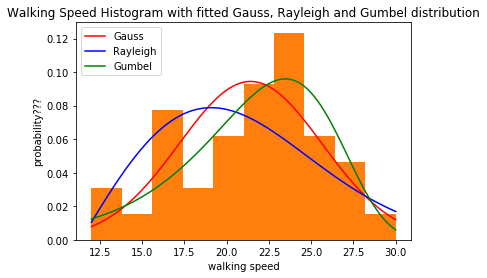

In [55]:
import scipy.stats as sst

# Fit Gauss, Rayleigh and Gumbel Distribution to Walking Speed Histogram 

# Plot histogram for w
plt.figure(0)
plt.hist(w,normed=1,alpha=0.3)
plt.xlabel('walking speed')
plt.ylabel('probability')
histvalue, bins, blub = plt.hist (w,normed=1) # get values of histogram
xmin=min(bins)
xmax=max(bins)
x = np.linspace(xmin,xmax,100) # array between min and max of w

# Gauss for w 

param = sst.norm.fit(w) # Distribution Fitting
# now, param[0] and param[1] are the mean and the standard deviation of the fitted distribution
# Fitted distribution
norm_pdf=sst.norm.pdf(x,loc=param[0],scale=param[1])
plt.plot (x,norm_pdf, "r-", label="Gauss")

# Rayleigh for w

param = sst.rayleigh.fit(w) # Distribution fitting
# Fitted distribution
pdf_fitted = sst.rayleigh.pdf(x,loc=param[0],scale=param[1]) 
plt.plot(x,pdf_fitted,'b-', label="Rayleigh")

# Left-Scewed Gumbel for w

param = sst.gumbel_l.fit(w)
gumbel_fitted = sst.gumbel_l.pdf(x, loc=param[0], scale=param[1])
plt.plot(x,gumbel_fitted,'g-', label="Gumbel")

plt.legend(loc='upper left')
plt.title('Walking Speed Histogram with fitted Gauss, Rayleigh and Gumbel distribution')

plt.show()

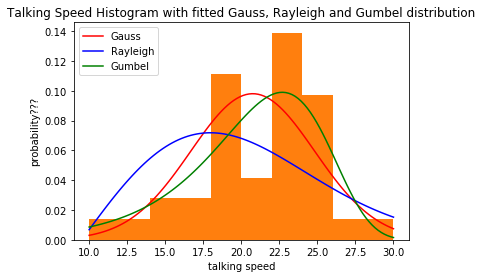

In [56]:
# Fit Gauss, Rayleigh and Gumbel Distribution to Talking Speed Histogram 

# Plot histogram for t
plt.figure(0)
plt.hist(t,normed=1,alpha=0.3)
plt.xlabel('talking speed')
plt.ylabel('probability')
histvalue, bins, blub = plt.hist (t,normed=1) # get values of histogram
xmin=min(bins)
xmax=max(bins)
x = np.linspace(xmin,xmax,100) # array between min and max of w

# Gauss for t 

param = sst.norm.fit(t) # Distribution Fitting
# now, param[0] and param[1] are the mean and the standard deviation of the fitted distribution
# Fitted distribution
norm_pdf=sst.norm.pdf(x,loc=param[0],scale=param[1])
plt.plot (x,norm_pdf, "r-", label="Gauss")

# Rayleigh for t

param = sst.rayleigh.fit(t) # Distribution fitting
# Fitted distribution
pdf_fitted = sst.rayleigh.pdf(x,loc=param[0],scale=param[1]) 
plt.plot(x,pdf_fitted,'b-', label="Rayleigh")

# Left-Scewed Gumbel for t

param = sst.gumbel_l.fit(t)
gumbel_fitted = sst.gumbel_l.pdf(x, loc=param[0], scale=param[1])
plt.plot(x,gumbel_fitted,'g-', label="Gumbel")

plt.legend(loc='upper left')
plt.title('Talking Speed Histogram with fitted Gauss, Rayleigh and Gumbel distribution')

plt.show()

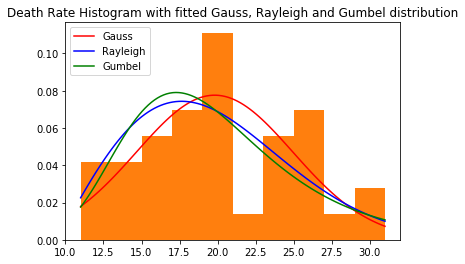

In [57]:
# Fit Gauss, Rayleigh and Gumbel Distribution to Death-Rate Histogram 

# Plot histogram for h
plt.figure(1)
plt.hist(h,normed=1,alpha=.3)
histvalue, bins, blub = plt.hist (h,normed=1) # get values of histogram
xmin=min(bins)
xmax=max(bins)
x = np.linspace(xmin,xmax,100) # array between min and max of w

# Gauss for h 

param = sst.norm.fit(h) # Distribution Fitting
# now, param[0] and param[1] are the mean and the standard deviation of the fitted distribution
# Fitted distribution
norm_pdf=sst.norm.pdf(x,loc=param[0],scale=param[1])
plt.plot (x,norm_pdf, "r-", label="Gauss")

# Rayleigh for h

param = sst.rayleigh.fit(h) # Distribution fitting
# Fitted distribution
pdf_fitted = sst.rayleigh.pdf(x,loc=param[0],scale=param[1]) 
plt.plot(x,pdf_fitted,'b-', label="Rayleigh")

# Right-Scewed Gumbel for h

param = sst.gumbel_r.fit(h)
gumbel_fitted = sst.gumbel_r.pdf(x, loc=param[0], scale=param[1])
plt.plot(x,gumbel_fitted,'g-', label="Gumbel")

plt.legend(loc='upper left')
plt.title('Death Rate Histogram with fitted Gauss, Rayleigh and Gumbel distribution')

plt.show()

## 4. fit bivariate Gaussian model

Fit the parameters necessary for a bivariate normal density function to the moments and the linear dependence of your data.

Plot on one plot 

- a scatterplot of your data
- the fitted bivariate normal density

Explain why you are happy or unhappy with the bivariate normal model.


In [65]:
# Fit bivariate normal density
# Define parameters of h and w 
mean_w=np.mean(w)
mean_h=np.mean(h)
cov_wh=np.cov(w,h)

print(mean_w)
print(mean_h)
print(cov_wh)

21.4166666667
19.8055555556
[[ 18.36428571   7.76904762]
 [  7.76904762  27.18968254]]


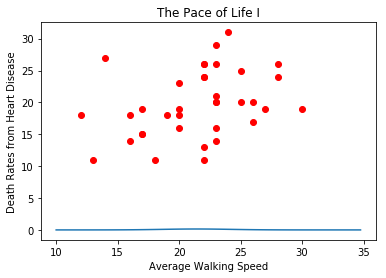

In [70]:
# Scatter Plot "walk" and "heart"
plt.plot(w,h,"ro")
plt.xlabel ('Average Walking Speed')
plt.ylabel ('Death Rates from Heart Disease')
plt.title ('The Pace of Life I')
plt.show()

# Add normal density plot
x = np.linspace(10, 35, 100, endpoint=False)
y = sst.multivariate_normal.pdf(x, mean=21.42, cov=7.77)
plt.plot(x, y)



## 5. distance matrix

For the spatial data in 

    `.../geostatistics/SS\ 2017/_geostats17_repo/data/spatial_examples/xy_Cl_LU.dat` 
    
(that we used before), calculate the distance between all pairs of measurements

a. visualize this distance matrix in 2D (e.g., `plt.imshow()` on a matrix

b. plot a histogram of the distances that occur (once)

In [60]:
#load the file:
XY = np.loadtxt("xy_Cl_LU.dat",skiprows=7, usecols=(0,1), unpack=True)
XY_transp=np.transpose(XY)
#print(XY_transp)
#calculate the distance matrix:
import scipy as sp
from scipy import spatial
from scipy.spatial import distance
distance=sp.spatial.distance.cdist(XY_transp,XY_transp,'euclidean')
distance_float=np.array(distance, dtype=float)
print(distance_float)
plt.imshow(distance_float,interpolation='none')
plt.show()
#plot a histogram of the distances:
#plt.hist(distance_float)
#plt.show()

ValueError: could not convert string to float: b'B-W'